## Punto 0

In [1]:
"""
    Il dataset bike.csv, che contiene il conteggio delle biciclette a noleggio tra gli anni 2011 e 2012, è 
    posto nella cartella esame sul desktop del vostro PC.
    Lo schema del dataset è

        - season : season (1:springer, 2:summer, 3:fall, 4:winter) 
        - yr : year (0: 2011, 1:2012) 
        - mnth : month ( 1 to 12) 
        - hr : hour (0 to 23) 
        - holiday : weather day is holiday or not (extracted from [Web Link]) 
        - weekday : day of the week 
        - workingday : if day is neither weekend nor holiday is 1, otherwise is 0. 
        + weathersit : 
        - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
        - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
        - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
        - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
        - temp : Normalized temperature in Celsius. The values are divided to 41 (max) 
        - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max) 
        - hum: Normalized humidity. The values are divided to 100 (max) 
        - windspeed: Normalized wind speed. The values are divided to 67 (max) 
        - casual: count of casual users 
        - registered: count of registered users 
        - cnt: count of total rental bikes including both casual and registered

Il separatore adottato è il carattere “;”
"""
print('')

In [2]:
#IMPORT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

# Metrics
from sklearn.metrics import (accuracy_score, confusion_matrix)

# Model Selection
from sklearn.model_selection import (cross_val_score, train_test_split)

# Decision tree
from sklearn.tree import DecisionTreeClassifier

## Parte 1

### Punto 1.1

In [3]:
"""
    Caricare il dataset e denominarlo con una variabile chiamata “dataset”
"""
path = 'bike.csv'
dataset = pd.read_csv(path, sep = ';')
dataset.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


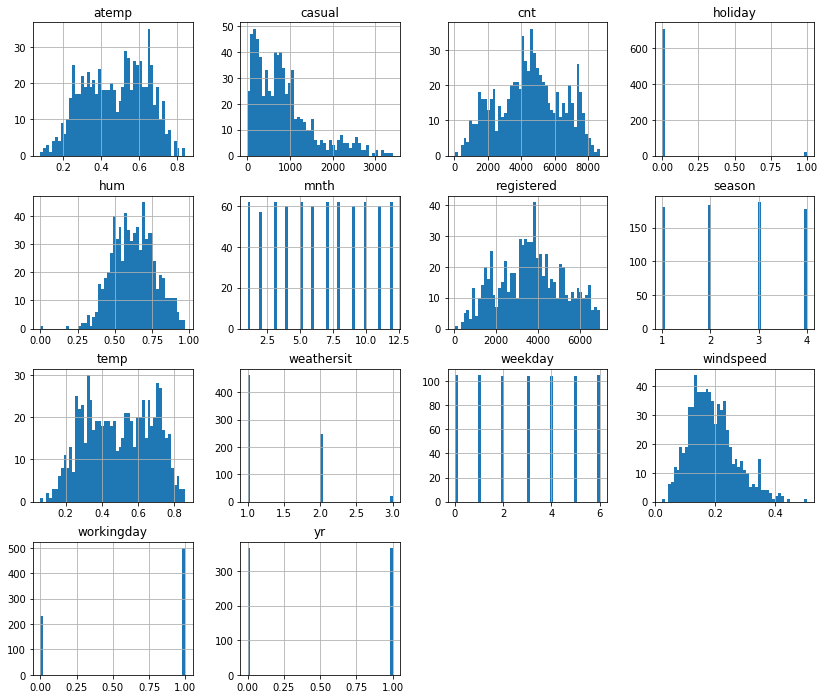

In [4]:
# Per questioni didattiche vedo come è definito il dataset
dataset.hist(figsize=(14, 12), bins=50)
plt.show()

### Punto 1.2

In [5]:
"""
    Indicare quante sono le biciclette noleggiate in primavera, estate, autunno, e inverno
"""
dataset_seasons = dataset.groupby(['season']).size()
print('Biciclette noleggiate in primavera: {}'.format(dataset_seasons[1]))
print('Biciclette noleggiate in estate: {}'.format(dataset_seasons[2]))
print('Biciclette noleggiate in autunno: {}'.format(dataset_seasons[3]))
print('Biciclette noleggiate in inverno: {}'.format(dataset_seasons[4]))

Biciclette noleggiate in primavera: 181
Biciclette noleggiate in estate: 184
Biciclette noleggiate in autunno: 188
Biciclette noleggiate in inverno: 178


### Punto 1.3

In [6]:
"""
    Raggruppando i noleggi per mesi e per anni e contando i noleggi effettuati è possibile verificare se
    ci sono andamenti particolari, ovvero: c’è un forte scostamento tra i noleggi effettuati un anno rispetto
    al secondo? C’è un forte scostamento tra i mesi?
"""
dataset_years = dataset.groupby(['mnth', 'yr']).size().unstack()
# Rinomino le colonne
name_columns = { 0 : '2011', 1 : '2012'}
dataset_years = dataset_years.rename(index = str, columns = name_columns)

# Stampa
print('Si può notare come lo scostamento sia praticamente nullo, l\'unica differenza si ha per il mese di Febbraio')
print('*' * 110)
print('Dataset:\n{}'.format(dataset_years))

Si può notare come lo scostamento sia praticamente nullo, l'unica differenza si ha per il mese di Febbraio
**************************************************************************************************************
Dataset:
yr    2011  2012
mnth            
1       31    31
2       28    29
3       31    31
4       30    30
5       31    31
6       30    30
7       31    31
8       31    31
9       30    30
10      31    31
11      30    30
12      31    31


### Punto 1.4

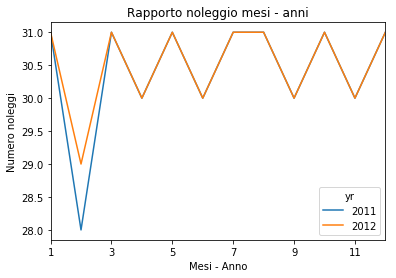

In [7]:
"""
    Realizzare un’immagine grafica  che rappresenti in maniera efficace la richiesta del punto 3
"""
dataset_years.plot(title = 'Rapporto noleggio mesi - anni')
plt.xlabel('Mesi - Anno')
plt.ylabel('Numero noleggi')
plt.show()

## Parte 2

### Punto 2.1

In [8]:
"""
    Si vuole predire il  tempo (weathersit) nella città sulla base degli altri valori del dataset.
    Dividere “dataset” in modo che 2/3 degli elementi casualmente scelti siano contenuti in un nuovo 
    dataset “train” e 1/3 nel dataset “test”.
    
    Valutare l’accuracy ottenuta con il modello LogisticRegression
    (from sklearn.linear_model import LogisticRegression)
"""
X = dataset.drop('weathersit', axis = 1)
Y = dataset['weathersit']

test_size = 0.33
random_state = 211
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test_size,
                                                    random_state = random_state)
print('Shape X_train: {}'.format(X_train.shape))
print('Shape X_test: {}'.format(X_test.shape))
print('Shape y_train: {}'.format(y_train.shape))
print('Shape y_test: {}'.format(y_test.shape))

# Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
accuracy_lr = logistic_regression.score(X_test, y_test)
print("Accuracy Logistic Regression: {:.03}".format(accuracy_lr))

Shape X_train: (489, 13)
Shape X_test: (242, 13)
Shape y_train: (489,)
Shape y_test: (242,)
Accuracy Logistic Regression: 0.764


### Punto 2.2

In [9]:
"""
    Il valore di accuratezza ottenuto è abbastanza elevato, tuttavia, cosa si scopre analizzando la 
    confusion matrix
"""
y_pred_lr = logistic_regression.predict(X_test)
cm_lr = confusion_matrix(y_test, y_pred_lr)
print('Confusion Matrix:\n {}'.format(cm_lr))

Confusion Matrix:
 [[155   6   0]
 [ 46  29   1]
 [  0   4   1]]


### Punto 2.3

In [10]:
"""
    Che valore di accuratezza si ottiene con un 5 Fold cross validation?
"""
num_folds = 5
scoring = 'accuracy'
scores = cross_val_score(logistic_regression, X, Y, cv=num_folds, scoring= scoring)
print("Scores Cross Validate: {:0.3f} ({:0.3f})".format(scores.mean(), scores.std()))

Scores Cross Validate: 0.691 (0.020)


### Punto 2.4

In [11]:
"""
    E’ un valore più o meno attendibile del precedente? Perché?
"""
print('E\' un valore più basso')

E' un valore più basso


### Punto 2.5

In [12]:
"""
    Se si utilizza un modello basato su Decision Tree che valore di accuratezza si ottiene 
    utilizzando entrambi i metodi? Cambia qualcosa nella confusion matrix?
"""
#model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

score_dt = decision_tree.score(X_test, y_test)
y_pred_dt = decision_tree.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Accuracy con Decision Tree: {:.03}".format(score_dt))
print("Decision tree \n {}".format(cm_dt))

Accuracy con Decision Tree: 0.723
Decision tree 
 [[123  38   0]
 [ 23  49   4]
 [  0   2   3]]


### Punto 2.6

In [13]:
"""
    Creare un nuovo attributo “tempSimpl” con due valori = 2 se la temperatura percepita (atemp)
    è maggiore della media, 1 se inferiore alla media. Si elimini poi la colonna atemp e si effettui 
    una valutazione 5 cross fold usando un modello basato su Decision Tree. Che accuratezza si ottiene?
"""
# Copio il dataset
dataset_new = dataset.copy()

# Calcolo media
mean_atemp = dataset_new['atemp'].mean()
# Sostituzione
dataset_new['tempSimpl'] = np.where(dataset_new['atemp'] < mean_atemp, 1, 2)
# Eliminazione riga 
dataset_new = dataset_new.drop('atemp', axis=1)
# Verifica tramite numero di istance
size_tempSimpl = dataset_new.groupby(dataset_new['tempSimpl']).size()
print('Verifica tramite il numero di istanze')
print('Numeri di righe con \'tempSimpl\' uguale a 1: {}'.format(size_tempSimpl[1]))
print('Numeri di righe con \'tempSimpl\' uguale a 2: {}'.format(size_tempSimpl[2]))
print('Totale: {}'.format(dataset_new.shape[0]))
values_tempSimpl = dataset_new['tempSimpl'].unique()
print('Valori della colonna: {}'.format(values_tempSimpl))

Y_new = dataset_new['weathersit']
X_new = dataset_new.drop('weathersit', axis = 1)

# Calcolo cross fold
test_size = 0.33
seed = 11
X_train_new, X_test_new, Y_train_new, Y_test_new = train_test_split(X_new, Y_new, test_size = test_size, 
                                                    random_state = seed)
decision_tree.fit(X_train_new, Y_train_new)

print('*' * 100)
num_folds = 5
scores = cross_val_score(decision_tree, X_new, Y_new, cv=num_folds, scoring= scoring)
print("Scores Cross Validate: {:0.3f}".format(scores.mean()))

Verifica tramite il numero di istanze
Numeri di righe con 'tempSimpl' uguale a 1: 357
Numeri di righe con 'tempSimpl' uguale a 2: 374
Totale: 731
Valori della colonna: [1 2]
****************************************************************************************************
Scores Cross Validate: 0.687


### Punto 2.7

In [14]:
"""
    Si modifichi  il “dataset” creando il dataset “simplified”. In questo si introduca un nuovo attributo
    “dayVsNight” con due valori: 1 se il valore di hr è compreso tra 8 e 20; 2 negli altri casi. Si elimini
    poi hr. Si eliminino pure le colonne casual, registered e cnt. Si provi il dataset con il DecisionTree 
    e una valutazione 5Fold. Che accuratezza si ottiene? Per quale motivo?
"""
print('NON SI PUO\' FARE - Manca la colonna')

# MODIFICHE PERSONALI
# Creo una nuova colonna nella quale sommo i valori delle colonne 'temp', 'atemp' e le divido per il prodotto
dataset_z = dataset.copy()
dataset_z['temp_z'] = (dataset['temp'] + dataset['atemp']) / (dataset['temp'] * dataset['atemp'])
# Elimino poi le due colonne
dataset_z = dataset_z.drop(['temp', 'atemp'], axis = 1)

# Modifico 'season' pre e post 2
dataset_z['season'] = np.where(dataset['season'] > 2, 1, 0)


# Calcolo l'accuratezza
Y_z = dataset_z['weathersit']
X_z = dataset_z.drop('weathersit', axis = 1)


# Calcolo cross fold
test_size = 0.33
seed = 11
X_train_z, X_test_z, Y_train_z, Y_test_z = train_test_split(X_z, Y_z, test_size = test_size, random_state = seed)

decision_tree.fit(X_train_z, Y_train_z)

print('*' * 100)
num_folds = 5
scores = cross_val_score(decision_tree, X_z, Y_z, cv=num_folds, scoring= scoring)
print("Scores Cross Validate: {:0.3f}".format(scores.mean()))

NON SI PUO' FARE - Manca la colonna
****************************************************************************************************
Scores Cross Validate: 0.674


In [15]:
"""
PUNTO 2.8
    Si crei l’attributo “day” con valore 1 se è giorno (si ha il valore 1 in “dayVsNight”) e 0 negli altri 
    casi. Si crei l’attributo “night” con valore 1 se è notte (si ha  il valore 2 in “dayVsNight”) e 0 
    negli altri casi. Si elimini poi “dayVsNight”. Cambia qualcosa nella accuratezza?
"""
print('NON SI PUO\' FARE - Manca la colonna')

dataset_z2 = dataset_z.copy()

# Modifiche personali
# Creo la colonna dummies di 'season'
season_dummies = pd.get_dummies(dataset_z2['season'])
dataset_z2 = pd.concat([dataset_z2, season_dummies], axis = 1)
dataset_z2 = dataset_z2.drop('season', axis = 1)
dataset_z2.head()

# Calcolo l'accuratezza
Y_z2 = dataset_z2['weathersit']
X_z2 = dataset_z2.drop('weathersit', axis = 1)


# Calcolo cross fold
test_size = 0.33
seed = 11
X_train_z2, X_test_z2, Y_train_z2, Y_test_z2 = train_test_split(X_z2, Y_z2, test_size = test_size, 
                                                                random_state = seed)

decision_tree.fit(X_train_z2, Y_train_z2)

print('*' * 100)
num_folds = 5
scores = cross_val_score(decision_tree, X_z2, Y_z2, cv=num_folds, scoring= scoring)
print("Scores Cross Validate: {:0.3f}".format(scores.mean()))

NON SI PUO' FARE - Manca la colonna
****************************************************************************************************
Scores Cross Validate: 0.663
